installing stuff


In [1]:
from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,make_scorer,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.metrics import matthews_corrcoef

In [4]:
df = pd.read_csv("./Data_clean/min_max_both_inter_scaled.csv")

In [5]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264158,0.296902,0.297637,0.350616,0.201613,0.321919,0.342154,0.277402,0.337003,0.247970
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.048145,0.112494,0.144199,0.058008,0.064819,0.105683,0.091123,0.066463,...,0.313762,0.220056,0.178957,0.123532,0.123297,0.138093,0.156646,0.235791,0.211602,0.184829
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [6]:
X = df.drop(["FLAG","CONS_NO"],axis=1)

In [7]:
y= df.FLAG

In [2]:
model_grade = CatBoostClassifier(verbose=0)

In [4]:
CatBoostClassifier(verbose=1,)

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x000001F4C1D27490>>

In [9]:
X= np.array(X.values)

In [10]:
y= np.array(y.values)

In [ ]:
CatBoostClassifier(verbose=1)

## Testing the dataset against original model

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [13]:
model_grade.fit(x_train,y_train)

In [14]:
y_pred =model_grade.predict(x_test)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7343
           1       0.78      0.10      0.18       709

    accuracy                           0.92      8052
   macro avg       0.85      0.55      0.57      8052
weighted avg       0.91      0.92      0.89      8052



In [16]:
accuracy_score(y_test,y_pred)

0.9184053651266766

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[7323   20]
 [ 637   72]]
Normalized confusion matrix
[[0.99727632 0.00272368]
 [0.89844852 0.10155148]]


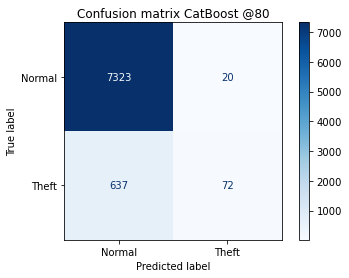

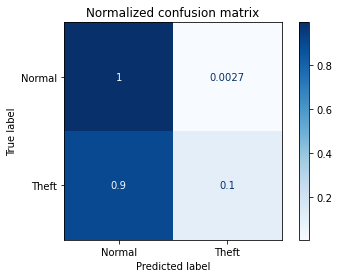

In [20]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [21]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

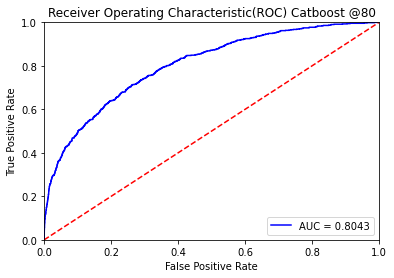

In [23]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Testing the dataset against SMOTE 100 model

In [25]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=1,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [26]:
model_grade = CatBoostClassifier(max_depth=10,verbose=0)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [28]:
model_grade.fit(x_train,y_train)

In [29]:
y_pred =model_grade.predict(x_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7282
           1       0.95      0.97      0.96      7389

    accuracy                           0.96     14671
   macro avg       0.96      0.96      0.96     14671
weighted avg       0.96      0.96      0.96     14671



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[6896  386]
 [ 240 7149]]
Normalized confusion matrix
[[0.94699258 0.05300742]
 [0.03248071 0.96751929]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


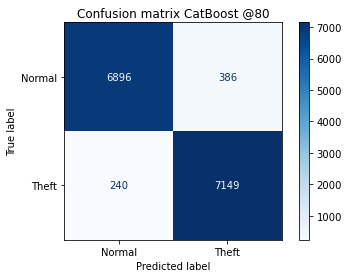

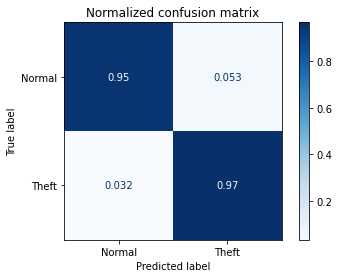

In [31]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [32]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

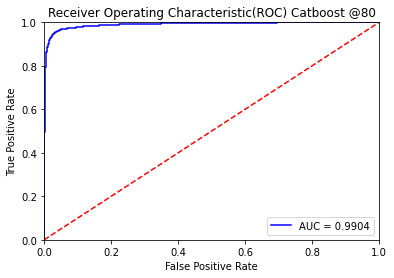

In [33]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## doing the sampling without any optimization

In [ ]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=1,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [34]:
model_grade = CatBoostClassifier(verbose=0)

In [35]:
model_grade.fit(x_train,y_train)

In [36]:
y_pred =model_grade.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[6613  669]
 [ 542 6847]]
Normalized confusion matrix
[[0.90812963 0.09187037]
 [0.07335228 0.92664772]]


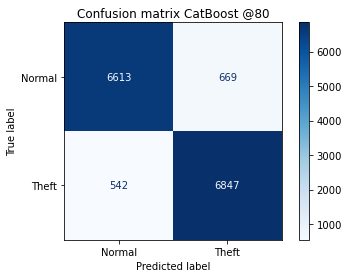

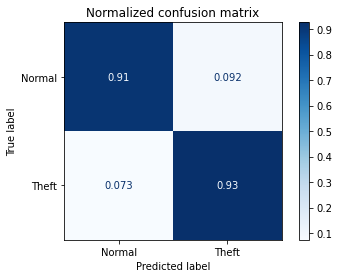

In [37]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [38]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

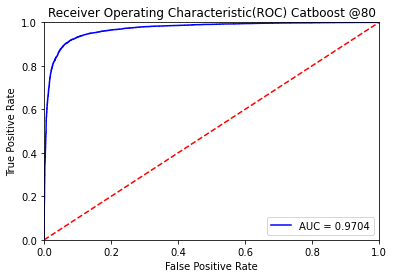

In [39]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


### doing an SMOTE of 20% in different modes

In [40]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(over_x_train,over_y_train,test_size=0.20)

In [42]:
model_grade = CatBoostClassifier(verbose=0)

In [43]:
model_grade.fit(x_train,y_train)

In [44]:
y_pred =model_grade.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7335
           1       0.87      0.42      0.56      1468

    accuracy                           0.89      8803
   macro avg       0.88      0.70      0.75      8803
weighted avg       0.89      0.89      0.88      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[7243   92]
 [ 854  614]]
Normalized confusion matrix
[[0.9874574  0.0125426 ]
 [0.58174387 0.41825613]]


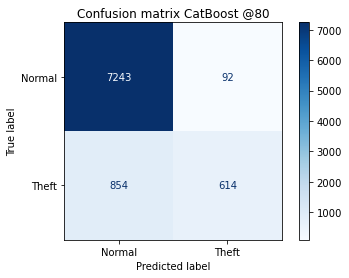

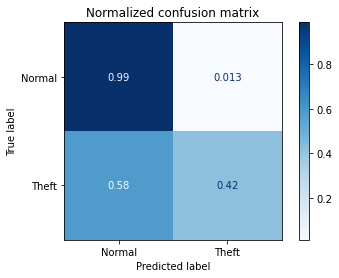

In [46]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [47]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

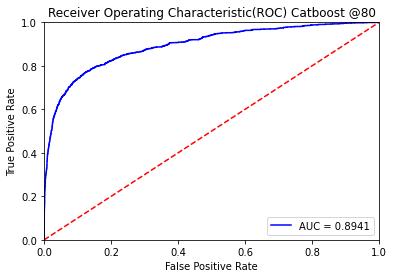

In [48]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## impplementing random undersampling with the model 100 %

In [12]:
#oversampling of minority class (imbalanced learning)
rus_under = RandomUnderSampler(sampling_strategy=1,random_state=0)
rus_x_train,rus_y_train = rus_under.fit_resample(X,y)

In [13]:
model_grade = CatBoostClassifier(verbose=0)

In [15]:
len(rus_x_train)

7158

In [16]:
len(rus_y_train)

7158

In [17]:
x_train,x_test,y_train,y_test = train_test_split(rus_x_train,rus_y_train,test_size=0.20)

In [18]:
model_grade.fit(x_train,y_train)

In [19]:
y_pred =model_grade.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       683
           1       0.73      0.69      0.71       749

    accuracy                           0.70      1432
   macro avg       0.70      0.71      0.70      1432
weighted avg       0.71      0.70      0.70      1432



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[491 192]
 [231 518]]
Normalized confusion matrix
[[0.71888726 0.28111274]
 [0.30841121 0.69158879]]


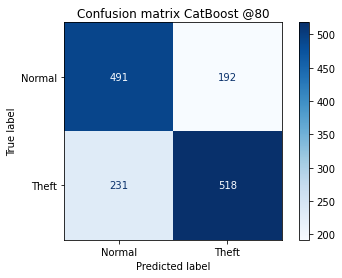

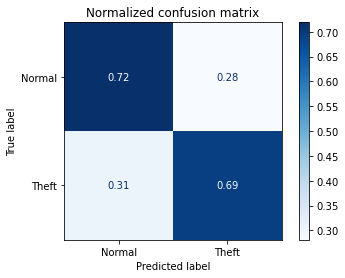

In [21]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [22]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

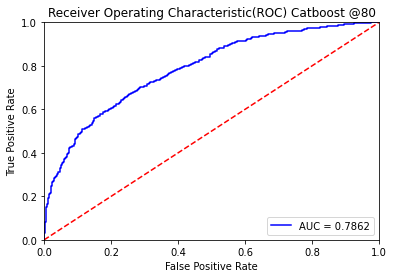

In [23]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

#### using the model in the hyper parameters 

In [24]:
model_grade = CatBoostClassifier(max_depth=10,verbose=0)

In [25]:
model_grade.fit(x_train,y_train)

In [26]:
y_pred =model_grade.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       683
           1       0.73      0.70      0.71       749

    accuracy                           0.71      1432
   macro avg       0.71      0.71      0.71      1432
weighted avg       0.71      0.71      0.71      1432



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[492 191]
 [227 522]]
Normalized confusion matrix
[[0.72035139 0.27964861]
 [0.30307076 0.69692924]]


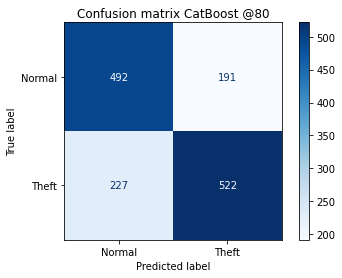

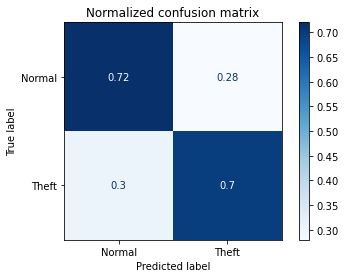

In [28]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [29]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

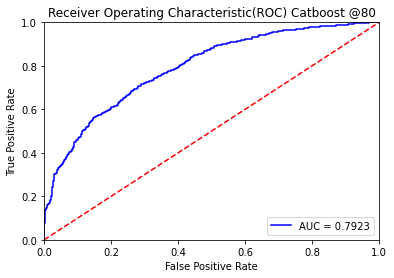

In [30]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## using Near Miss in cat

In [33]:
#oversampling of minority class (imbalanced learning)
near_under = NearMiss(sampling_strategy=1,n_jobs=-1)
near_x_train,near_y_train = near_under.fit_resample(X,y)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(near_x_train,near_y_train,test_size=0.20)

In [35]:
model_grade = CatBoostClassifier(verbose=0)

In [36]:
model_grade.fit(x_train,y_train)

In [37]:
y_pred =model_grade.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       735
           1       0.96      0.86      0.91       697

    accuracy                           0.92      1432
   macro avg       0.92      0.92      0.92      1432
weighted avg       0.92      0.92      0.92      1432



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[713  22]
 [ 95 602]]
Normalized confusion matrix
[[0.97006803 0.02993197]
 [0.13629842 0.86370158]]


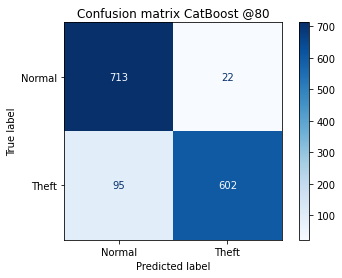

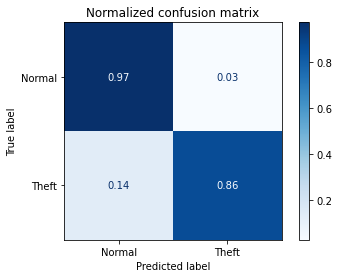

In [39]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [40]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

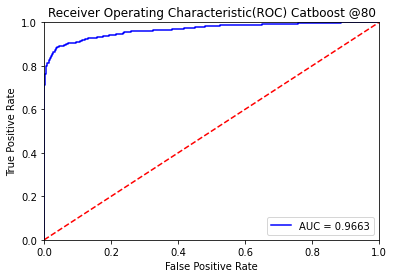

In [41]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## using the model cat that i built

In [42]:
#oversampling of minority class (imbalanced learning)
near_under = NearMiss(sampling_strategy=1,n_jobs=-1)
near_x_train,near_y_train = near_under.fit_resample(X,y)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(near_x_train,near_y_train,test_size=0.20)

In [44]:
model_grade = CatBoostClassifier(max_depth=10,verbose=0)

In [45]:
model_grade.fit(x_train,y_train)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       717
           1       0.49      0.43      0.46       715

    accuracy                           0.49      1432
   macro avg       0.49      0.49      0.49      1432
weighted avg       0.49      0.49      0.49      1432



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix CatBoost @80
[[697  20]
 [101 614]]
Normalized confusion matrix
[[0.972106   0.027894  ]
 [0.14125874 0.85874126]]


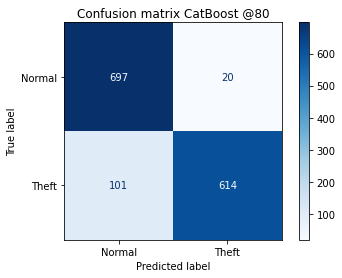

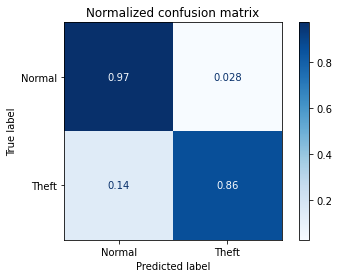

In [47]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix CatBoost @80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model_grade,x_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [48]:
probs = model_grade.predict_proba(x_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

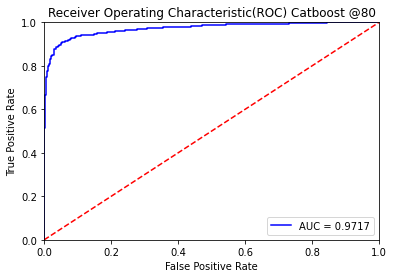

In [49]:
plt.title("Receiver Operating Characteristic(ROC) Catboost @80")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()